In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv ('/content/drive/My Drive/Dataset/CrimeCount.csv',index_col='Community Name')
data

,Sector,Group Category,Category,Crime Count,Resident Count,Year,Month
Community Name,,,,,,,
WHITEHORN,NORTHEAST,Crime,Street Robbery,1,12019,2019,SEP
FOOTHILLS,EAST,Crime,Theft OF Vehicle,10,317,2019,NOV
ACADIA,SOUTH,Crime,Theft FROM Vehicle,13,10520,2019,SEP
MAHOGANY,SOUTHEAST,Crime,Theft OF Vehicle,1,11784,2019,NOV
LINCOLN PARK,WEST,Crime,Commercial Break & Enter,5,2617,2019,NOV
...,...,...,...,...,...,...,...
WOODBINE,SOUTH,Disorder,Physical Disorder,2,9131,2013,JAN
NORTH GLENMORE PARK,WEST,Crime,Assault (Non-domestic),2,2333,2014,MAR
HAYSBORO,SOUTH,Disorder,Physical Disorder,5,6943,2012,SEP


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Sector          100000 non-null  object
 1   Community Name  100000 non-null  object
 2   Group Category  100000 non-null  object
 3   Category        100000 non-null  object
 4   Crime Count     100000 non-null  int64 
 5   Resident Count  100000 non-null  int64 
 6   Year            100000 non-null  int64 
 7   Month           100000 non-null  object
dtypes: int64(3), object(5)
memory usage: 6.1+ MB


In [ ]:
com_name = data['Community Name'].value_counts()
com_name

BELTLINE                    782
DOWNTOWN COMMERCIAL CORE    752
FOREST LAWN                 720
MARLBOROUGH                 686
FALCONRIDGE                 677
                           ... 
09P                           3
05G                           2
03C                           2
MEDICINE HILL                 2
05F                           1
Name: Community Name, Length: 300, dtype: int64

In [ ]:
cn = pd.DataFrame(com_name)
cn

,Community Name
BELTLINE,782
DOWNTOWN COMMERCIAL CORE,752
FOREST LAWN,720
MARLBOROUGH,686
FALCONRIDGE,677
...,...
09P,3
05G,2
03C,2
MEDICINE HILL,2


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


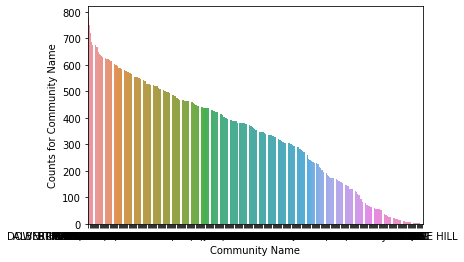

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot (x=cn.index, y=cn['Community Name'])
plt.xlabel('Community Name')
plt.ylabel('Counts for Community Name')
plt.show()

In [ ]:
data = pd.get_dummies(data)
data

,Crime Count,Resident Count,Year,Sector_CENTRE,Sector_EAST,Sector_NORTH,Sector_NORTHEAST,Sector_NORTHWEST,Sector_SOUTH,Sector_SOUTHEAST,Sector_WEST,Community Name_01B,Community Name_01C,Community Name_01E,Community Name_01F,Community Name_01G,Community Name_01H,Community Name_01K,Community Name_02A,Community Name_02B,Community Name_02C,Community Name_02E,Community Name_02F,Community Name_02K,Community Name_02L,Community Name_03C,Community Name_03H,Community Name_03I,Community Name_03S,Community Name_03V,Community Name_03W,Community Name_05B,Community Name_05C,Community Name_05D,Community Name_05E,Community Name_05F,Community Name_05G,Community Name_06A,Community Name_06B,Community Name_09H,...,Community Name_VALLEYFIELD,Community Name_VARSITY,Community Name_VISTA HEIGHTS,Community Name_WALDEN,Community Name_WEST HILLHURST,Community Name_WEST SPRINGS,Community Name_WESTGATE,Community Name_WESTWINDS,Community Name_WHITEHORN,Community Name_WILDWOOD,Community Name_WILLOW PARK,Community Name_WINDSOR PARK,Community Name_WINSTON HEIGHTS/MOUNTVIEW,Community Name_WOODBINE,Community Name_WOODLANDS,Group Category_Crime,Group Category_Disorder,Category_1320.131,Category_Assault (Non-domestic),Category_Commercial Break & Enter,Category_Commercial Robbery,Category_Physical Disorder,Category_Residential Break & Enter,Category_Social Disorder,Category_Street Robbery,Category_Theft FROM Vehicle,Category_Theft OF Vehicle,Category_Violence Other (Non-domestic),Month_APR,Month_AUG,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP
0,1,12019,2019,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,10,317,2019,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,13,10520,2019,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,11784,2019,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,2617,2019,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,9131,2013,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
99996,2,2333,2014,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
99997,5,6943,2012,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
99998,7,0,2013,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
Y = data.pop('Crime Count')
x = data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.3, random_state = 0)

In [ ]:
reg = LinearRegression().fit(x_train, y_train)

In [ ]:
y_train_pre = reg.predict(x_train)
print("%.2f" % mean_squared_error(y_train, y_train_pre))
print("%.2f" % r2_score(y_train, y_train_pre))

471.51
0.31


In [ ]:
y_predicted = reg.predict(x_test)

In [ ]:
print('Coefficients: \n',reg.coef_)

Coefficients: 
 [ 6.43224153e-04  3.51003644e-01 -9.84950587e+08 -9.86327374e+08
 -9.84950588e+08 -9.45899715e+08 -9.51161333e+08 -9.50178612e+08
 -1.07188103e+09 -9.50178614e+08  7.82684085e+06  6.84412052e+06
  6.84411115e+06  7.82683837e+06  7.82683622e+06  6.84411287e+06
  7.82684385e+06  7.82684890e+06  4.16160926e+07  4.16160820e+07
  7.82684170e+06  7.82683714e+06  4.16160925e+07  4.16160850e+07
  4.16161059e+07  2.56522398e+06  2.56521725e+06  2.56521342e+06
  2.56523361e+06  4.16160960e+07  2.56521354e+06  2.56522110e+06
  2.56522757e+06  2.56522028e+06  2.56520800e+06  2.56523792e+06
  6.84411618e+06  6.84410544e+06  4.29928749e+07  4.29928806e+07
  1.28546529e+08  4.29928876e+07  4.29928802e+07  4.29928846e+07
  4.29928854e+07  4.29928816e+07  4.29928783e+07  2.56522123e+06
  2.56520763e+06  1.28546541e+08  1.28546533e+08  1.28546536e+08
  1.28546535e+08  1.28546535e+08  1.28546534e+08  6.84410407e+06
  6.84411377e+06  6.84410830e+06  6.84410354e+06  6.84411058e+06
  6.84411

In [ ]:
print("Mean Squared error: %.2f" %mean_squared_error(y_test, y_predicted))

Mean Squared error: 511.37


In [ ]:
print("Coefficient of determination: %.2f" %r2_score(y_test, y_predicted))

Coefficient of determination: 0.31


In [ ]:
x_test.shape

(30000, 335)

In [ ]:
import matplotlib.pyplot as plt

ValueError: ignored

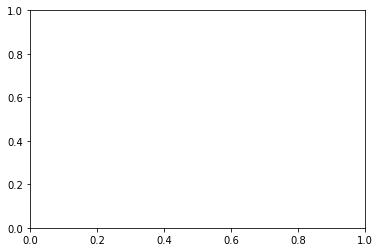

In [ ]:
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_predicted, color='blue', linewidth=3)
plt.show()